In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/floodlight-ms-dataset/complete_dataset_final.csv
/kaggle/input/floodlight-ms-dataset/clean_measure_table.csv
/kaggle/input/floodlight-ms-dataset/complete_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/floodlight-ms-dataset/complete_dataset.csv')

In [3]:
df.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricId,testResultMetricCreatedOn,testResultMetricTimestamp1,testResultMetricTimestamp2,testResultMetricValue,Unnamed: 19
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,115524,4/23/2018 12:22:57 AM +00:00,NaN,NaN,4.00,NaN
1,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,116040,4/25/2018 4:04:32 AM +00:00,NaN,NaN,5.00,NaN
2,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116041,4/25/2018 4:06:51 AM +00:00,NaN,NaN,16.00,NaN
3,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116042,4/25/2018 4:06:51 AM +00:00,NaN,NaN,0.94,NaN
4,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116043,4/25/2018 4:06:51 AM +00:00,NaN,NaN,39.00,NaN


In [4]:
df.shape

(485960, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485960 entries, 0 to 485959
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floodlightOpenId               485960 non-null  object 
 1   participantCreatedOn           485960 non-null  object 
 2   participantIsControl           485960 non-null  bool   
 3   participantCountryOfResidence  485960 non-null  object 
 4   participantSex                 485960 non-null  object 
 5   participantBirthYear           485960 non-null  int64  
 6   participantWeightLbs           485960 non-null  float64
 7   participantHeightCms           485960 non-null  float64
 8   testName                       485960 non-null  object 
 9   testCode                       485960 non-null  object 
 10  testMetricName                 485960 non-null  object 
 11  testMetricCode                 485960 non-null  object 
 12  testStartedAt                 

In [6]:
df.isnull().sum()

floodlightOpenId                      0
participantCreatedOn                  0
participantIsControl                  0
participantCountryOfResidence         0
participantSex                        0
participantBirthYear                  0
participantWeightLbs                  0
participantHeightCms                  0
testName                              0
testCode                              0
testMetricName                        0
testMetricCode                        0
testStartedAt                         0
testEndedAt                           0
testResultMetricId                    0
testResultMetricCreatedOn             0
testResultMetricTimestamp1       485960
testResultMetricTimestamp2       485960
testResultMetricValue                 0
Unnamed: 19                      485960
dtype: int64

In [7]:
# handling null values 
columns_to_drop = ['testResultMetricTimestamp2', 'testResultMetricTimestamp1', 'Unnamed: 19']
df=df.drop(columns=columns_to_drop)

In [8]:
df.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricId,testResultMetricCreatedOn,testResultMetricValue
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,115524,4/23/2018 12:22:57 AM +00:00,4.00
1,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,116040,4/25/2018 4:04:32 AM +00:00,5.00
2,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116041,4/25/2018 4:06:51 AM +00:00,16.00
3,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116042,4/25/2018 4:06:51 AM +00:00,0.94
4,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116043,4/25/2018 4:06:51 AM +00:00,39.00


In [9]:
df.duplicated().sum()

270

In [10]:
df.drop_duplicates()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricId,testResultMetricCreatedOn,testResultMetricValue
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,115524,4/23/2018 12:22:57 AM +00:00,4.00
1,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,116040,4/25/2018 4:04:32 AM +00:00,5.00
2,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116041,4/25/2018 4:06:51 AM +00:00,16.00
3,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116042,4/25/2018 4:06:51 AM +00:00,0.94
4,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116043,4/25/2018 4:06:51 AM +00:00,39.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485955,FL72921691,5/17/2021 6:57:36 PM +00:00,False,BE,female,1977,168.0,176.0,Draw A Shape,draw_a_shape,Mean Hausdorff Distance Best,mean_hausdorff_distance_best,5/17/2021 7:07:56 PM +00:00,5/17/2021 7:08:31 PM +00:00,136736,5/17/2021 7:08:32 PM +00:00,0.14
485956,FL72921691,5/17/2021 6:57:36 PM +00:00,False,BE,female,1977,168.0,176.0,Draw A Shape,draw_a_shape,Hand Used,hand_used,5/17/2021 7:07:56 PM +00:00,5/17/2021 7:08:31 PM +00:00,136737,5/17/2021 7:08:32 PM +00:00,1.00
485957,FL72921691,5/17/2021 6:57:36 PM +00:00,False,BE,female,1977,168.0,176.0,Static Balance,static_balance,Sway Path,sway_path,5/17/2021 7:08:58 PM +00:00,5/17/2021 7:09:30 PM +00:00,136738,5/17/2021 7:09:30 PM +00:00,12.03
485958,FL72921691,5/17/2021 6:57:36 PM +00:00,False,BE,female,1977,168.0,176.0,Five UTurn Test,five_u_turn,Turns,turns,5/17/2021 7:09:54 PM +00:00,5/17/2021 7:10:56 PM +00:00,136739,5/17/2021 7:10:58 PM +00:00,14.00


In [11]:
# encoding categorical data 
df["participantCountryOfResidence"].unique()

array(['US', 'CA', 'CH', 'AU', 'BR', 'DK', 'CZ', 'ES', 'IT', 'BE', 'FI',
       'PL', 'SE', 'MX', 'NL', 'EE'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
label_encoder=LabelEncoder()

In [14]:
# Apply label encoding to 'participantSex' column
df['participantSex_encoded'] = label_encoder.fit_transform(df['participantSex'])

# Apply label encoding to 'participantIsControl' column
df['participantIsControl_encoded'] = label_encoder.fit_transform(df['participantIsControl'])

# Apply label encoding to 'participantCountryOfResidence' column
df['participantCountry_encoded'] = label_encoder.fit_transform(df['participantCountryOfResidence'])

In [15]:
df['participantIsControl_encoded'].value_counts()

participantIsControl_encoded
0    401001
1     84959
Name: count, dtype: int64

In [16]:
df.head()

,floodlightOpenId,participantCreatedOn,participantIsControl,participantCountryOfResidence,participantSex,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricId,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded
0,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,115524,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15
1,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,116040,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15
2,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116041,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15
3,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116042,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15
4,FL10038084,4/23/2018 12:12:03 AM +00:00,True,US,male,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116043,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15


In [17]:
values=['participantIsControl','participantSex','participantCountryOfResidence']
df=df.drop(columns=values)

In [18]:
df.head()

,floodlightOpenId,participantCreatedOn,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricId,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded
0,FL10038084,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,115524,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15
1,FL10038084,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,116040,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15
2,FL10038084,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116041,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15
3,FL10038084,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116042,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15
4,FL10038084,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,116043,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15


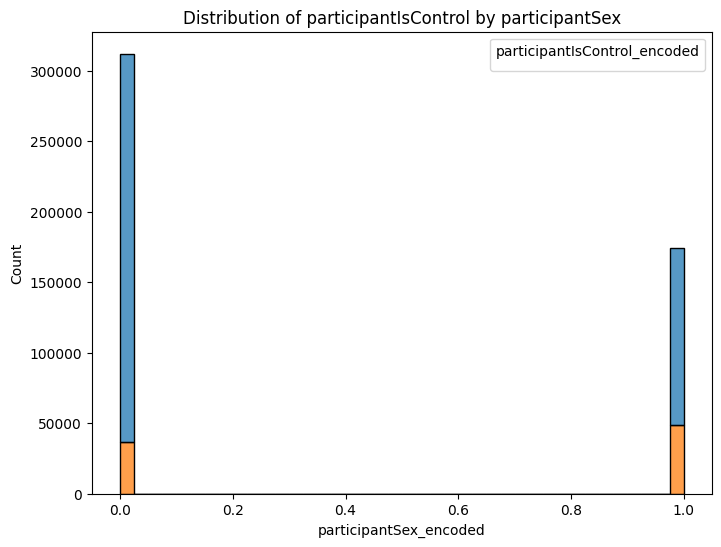

In [19]:
# visualize the data 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Create a histplot to visualize the distribution of participantIsControl_encoded based on participantSex_encoded
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='participantSex_encoded', hue='participantIsControl_encoded', multiple='stack')
plt.title('Distribution of participantIsControl by participantSex')
plt.xlabel('participantSex_encoded')
plt.ylabel('Count')
plt.legend(title='participantIsControl_encoded')
plt.show()

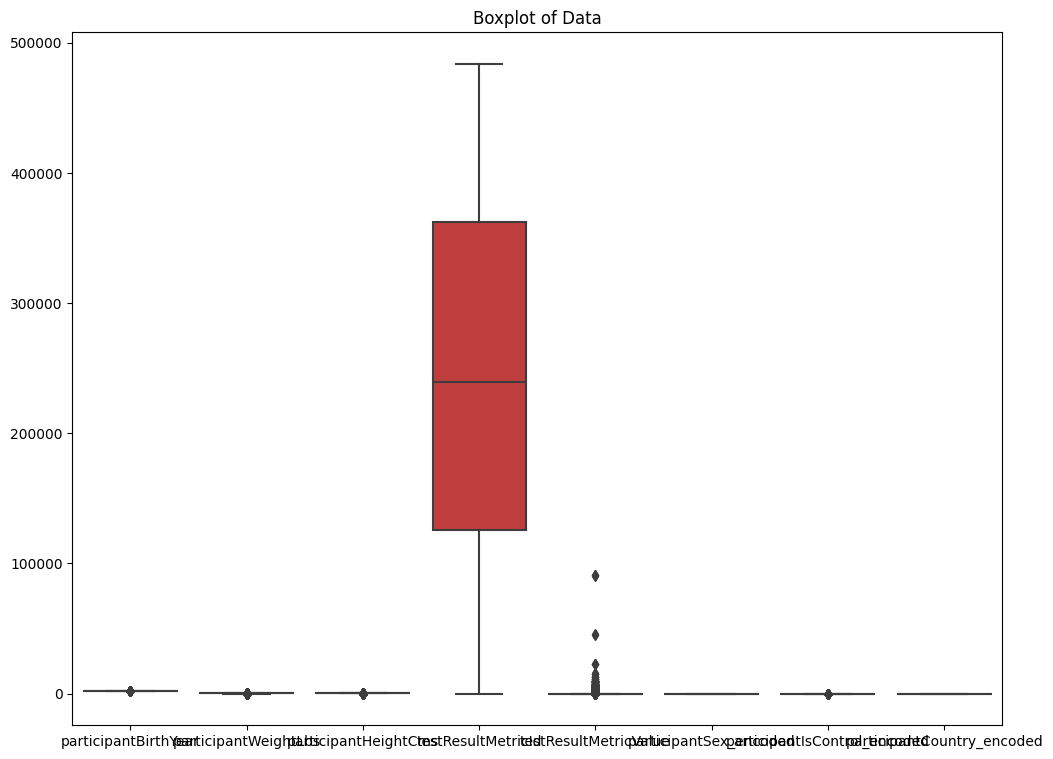

In [20]:
# Set up the boxplot using seaborn
plt.figure(figsize=(12, 9))
sns.boxplot(data=df)

# Add a title
plt.title("Boxplot of Data")

# Show the plot
plt.show()

In [21]:
values=['floodlightOpenId','testResultMetricId']
df=df.drop(columns=values)

In [22]:
df.head()

,participantCreatedOn,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded
0,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15
1,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15
2,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15
3,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15
4,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15


In [23]:
#Calculate the age using 'participantBirthYear'
current_year = pd.Timestamp.now().year
df['participantAge'] = current_year - df['participantBirthYear']

In [24]:
df.head()

,participantCreatedOn,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded,participantAge
0,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15,57
1,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15,57
2,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15,57
3,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15,57
4,4/23/2018 12:12:03 AM +00:00,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15,57


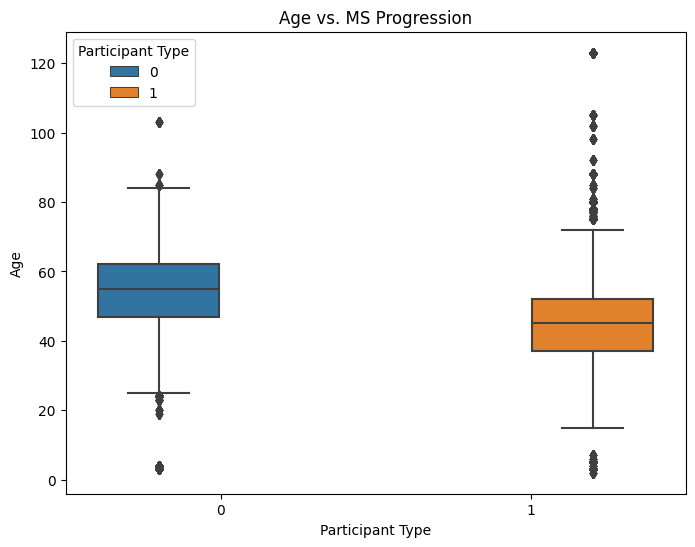

In [25]:
# visualize age with participantIsControl_encoded
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='participantIsControl_encoded', y='participantAge', hue='participantIsControl_encoded')
plt.title('Age vs. MS Progression')
plt.xlabel('Participant Type')
plt.ylabel('Age')
plt.legend(title='Participant Type')
plt.show()

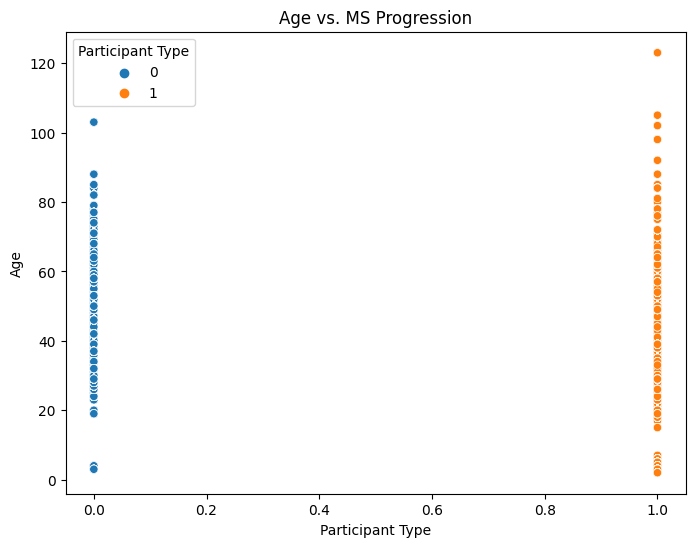

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='participantIsControl_encoded', y='participantAge', hue='participantIsControl_encoded')
plt.title('Age vs. MS Progression')
plt.xlabel('Participant Type')
plt.ylabel('Age')
plt.legend(title='Participant Type')
plt.show()

In [27]:
# Handling DateTime Data
# Convert 'participantCreatedOn_UTC' to datetime format
df['participantCreatedOn'] = pd.to_datetime(df['participantCreatedOn'])

# Extract year, month, and day from the datetime column
df['created_year'] = df['participantCreatedOn'].dt.year
df['created_month'] = df['participantCreatedOn'].dt.month
df['created_day'] = df['participantCreatedOn'].dt.day

# Display the updated DataFrame
df.head()

/tmp/ipykernel_28/338128257.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['participantCreatedOn'] = pd.to_datetime(df['participantCreatedOn'])


,participantCreatedOn,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded,participantAge,created_year,created_month,created_day
0,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:55 AM +00:00,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15,57,2018,4,23
1,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:31 AM +00:00,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15,57,2018,4,23
2,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15,57,2018,4,23
3,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15,57,2018,4,23
4,2018-04-23 00:12:03+00:00,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:35 AM +00:00,4/25/2018 4:06:51 AM +00:00,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15,57,2018,4,23


In [28]:
# Analyzing registration trends over different years
registration_by_year = df['created_year'].value_counts().sort_index()

# Analyzing registration trends over different months
registration_by_month = df['created_month'].value_counts().sort_index()

# Analyzing registration trends over different days
registration_by_day = df['created_day'].value_counts().sort_index()


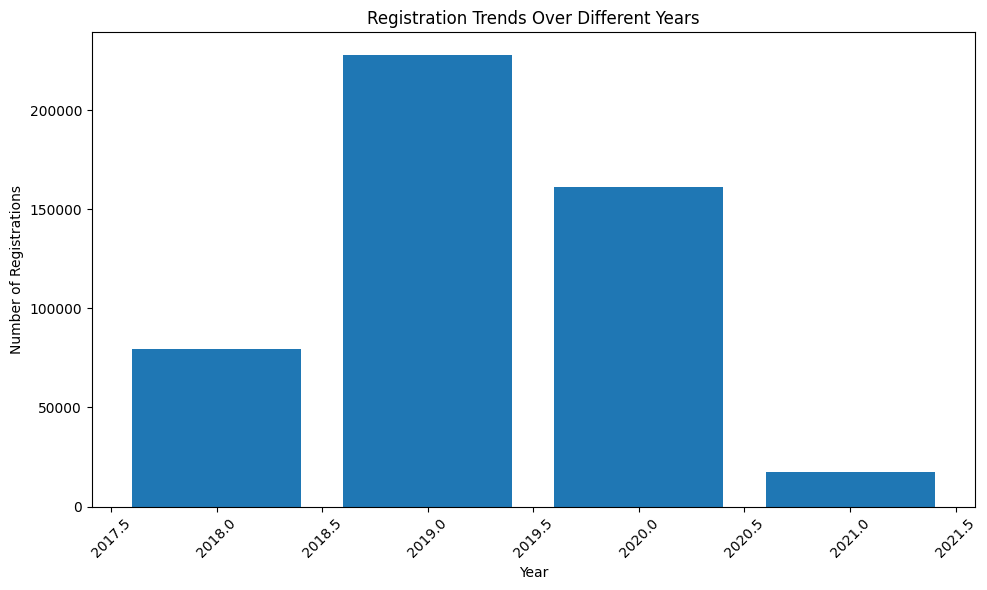

In [29]:
# Create a bar plot to visualize registration trends over different years
plt.figure(figsize=(10, 6))
plt.bar(registration_by_year.index, registration_by_year.values)
plt.title('Registration Trends Over Different Years')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

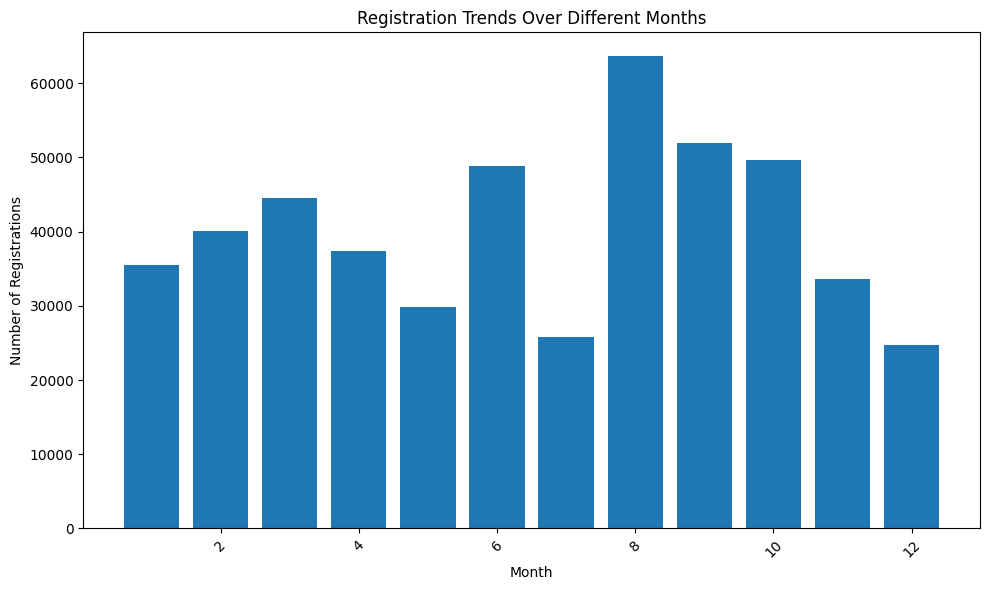

In [30]:
# Visualize registration trends over different months
plt.figure(figsize=(10, 6))
plt.bar(registration_by_month.index, registration_by_month.values)
plt.title('Registration Trends Over Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

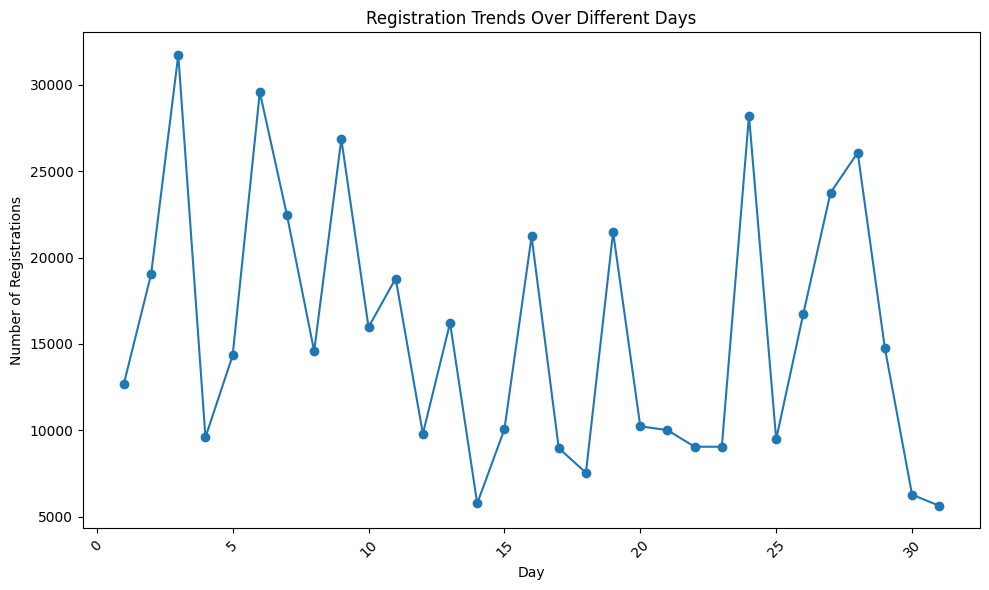

In [31]:
# Visualize registration trends over different days
plt.figure(figsize=(10, 6))
plt.plot(registration_by_day.index, registration_by_day.values, marker='o')
plt.title('Registration Trends Over Different Days')
plt.xlabel('Day')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
#Task Duration Analysis
# Convert 'testStartedAt' and 'testEndedAt' to datetime format
df['testStartedAt'] = pd.to_datetime(df['testStartedAt'])
df['testEndedAt'] = pd.to_datetime(df['testEndedAt'])

# Calculate the duration of each test/task in seconds
df['taskDuration'] = (df['testEndedAt'] - df['testStartedAt']).dt.total_seconds()

df.head()

/tmp/ipykernel_28/3029329768.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['testStartedAt'] = pd.to_datetime(df['testStartedAt'])
/tmp/ipykernel_28/3029329768.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['testEndedAt'] = pd.to_datetime(df['testEndedAt'])


,participantCreatedOn,participantBirthYear,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testStartedAt,testEndedAt,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded,participantAge,created_year,created_month,created_day,taskDuration
0,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,2018-04-23 00:22:55+00:00,2018-04-23 00:22:55+00:00,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15,57,2018,4,23,0.0
1,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,2018-04-25 04:04:31+00:00,2018-04-25 04:04:31+00:00,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15,57,2018,4,23,0.0
2,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,2018-04-25 04:06:35+00:00,2018-04-25 04:06:51+00:00,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15,57,2018,4,23,16.0
3,2018-04-23 00:12:03+00:00,1966,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,2018-04-25 04:06:35+00:00,2018-04-25 04:06:51+00:00,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15,57,2018,4,23,16.0
4,2018-04-23 00:12:03+00:00,1966,159.0,178.0,IPS,ips,Correct Responses,correct_responses,2018-04-25 04:06:35+00:00,2018-04-25 04:06:51+00:00,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15,57,2018,4,23,16.0


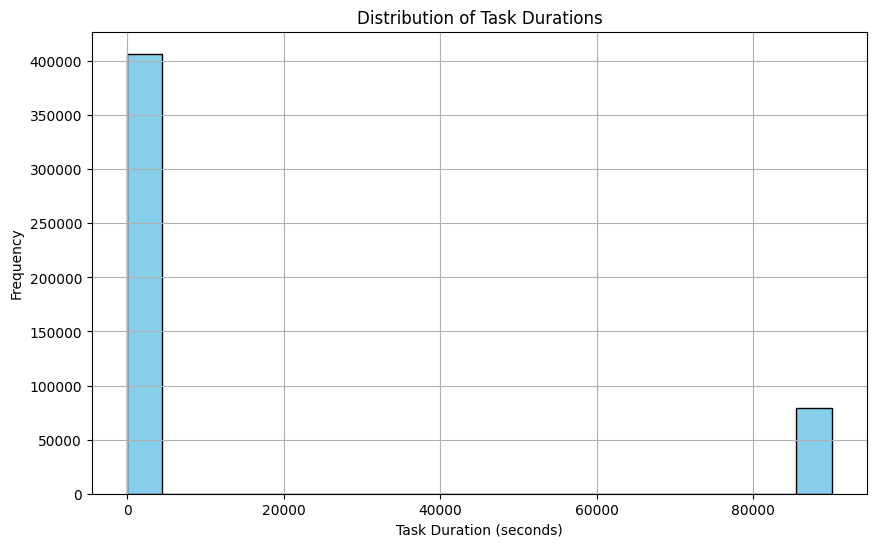

In [33]:
# Create a histogram of task durations
plt.figure(figsize=(10, 6))
plt.hist(df['taskDuration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Task Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Task Durations')
plt.grid(True)
plt.show()

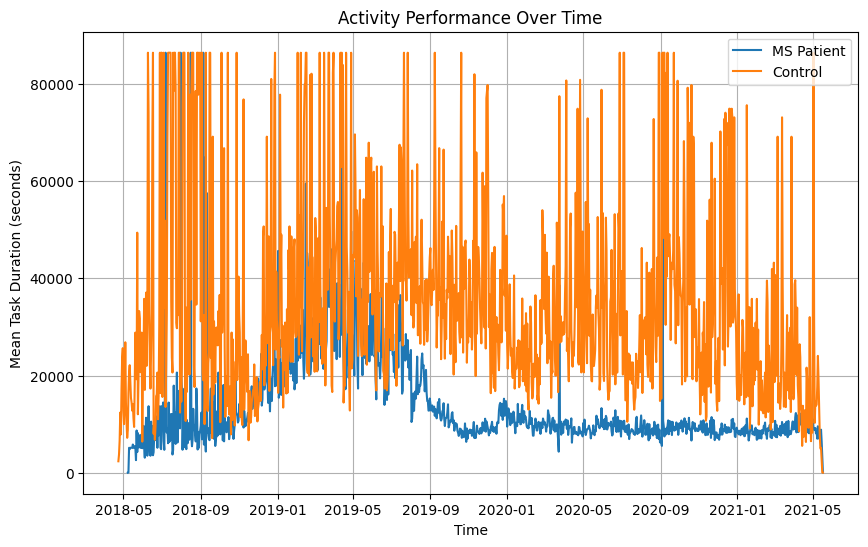

In [34]:
# Time Variation in Activity Performance
# Convert 'testStartedAt' and 'testEndedAt' to datetime format
df['testStartedAt'] = pd.to_datetime(df['testStartedAt'])
df['testEndedAt'] = pd.to_datetime(df['testEndedAt'])

# Calculate the task duration in seconds
df['taskDuration'] = (df['testEndedAt'] - df['testStartedAt']).dt.total_seconds()

# Group by 'participantIsControl' and time period (e.g., day, week)
time_period = 'D'  # You can change this to 'W' for week or other appropriate values
grouped = df.groupby(['participantIsControl_encoded', pd.Grouper(key='testStartedAt', freq=time_period)])

# Calculate mean task duration for each group and time period
mean_durations = grouped['taskDuration'].mean().reset_index()

# Plot activity performance over time
plt.figure(figsize=(10, 6))
for control, group in mean_durations.groupby('participantIsControl_encoded'):
    plt.plot(group['testStartedAt'], group['taskDuration'], label='Control' if control else 'MS Patient')
plt.xlabel('Time')
plt.ylabel('Mean Task Duration (seconds)')
plt.title('Activity Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

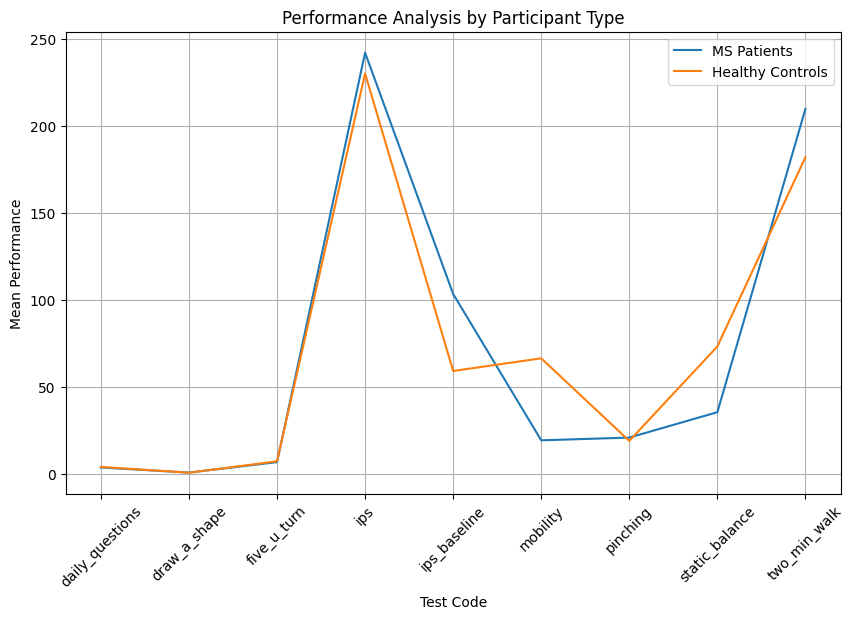

In [35]:
#assess participants' performance in different tests
# Group by participant type and test to calculate mean performance
grouped = df.groupby(['participantIsControl_encoded', 'testCode'])['testResultMetricValue'].mean().reset_index()

# Visualize performance trends for MS patients and healthy controls
plt.figure(figsize=(10, 6))
for control, group in grouped.groupby('participantIsControl_encoded'):
    control_label = 'Healthy Controls' if control else 'MS Patients'
    plt.plot(group['testCode'], group['testResultMetricValue'], label=control_label)
plt.xlabel('Test Code')
plt.ylabel('Mean Performance')
plt.title('Performance Analysis by Participant Type')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

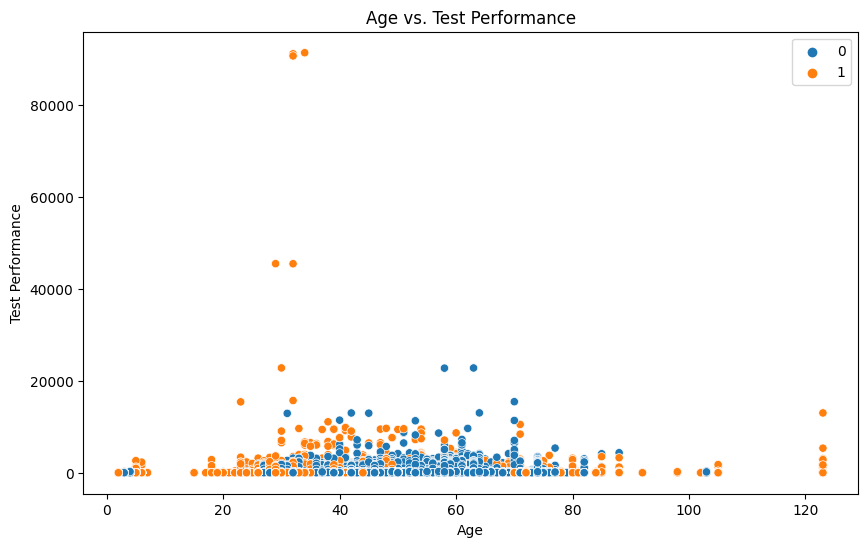

In [36]:
# Relationship between age and test performance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='participantAge', y='testResultMetricValue', hue='participantIsControl_encoded')
plt.title('Age vs. Test Performance')
plt.xlabel('Age')
plt.ylabel('Test Performance')
plt.legend()
plt.show()

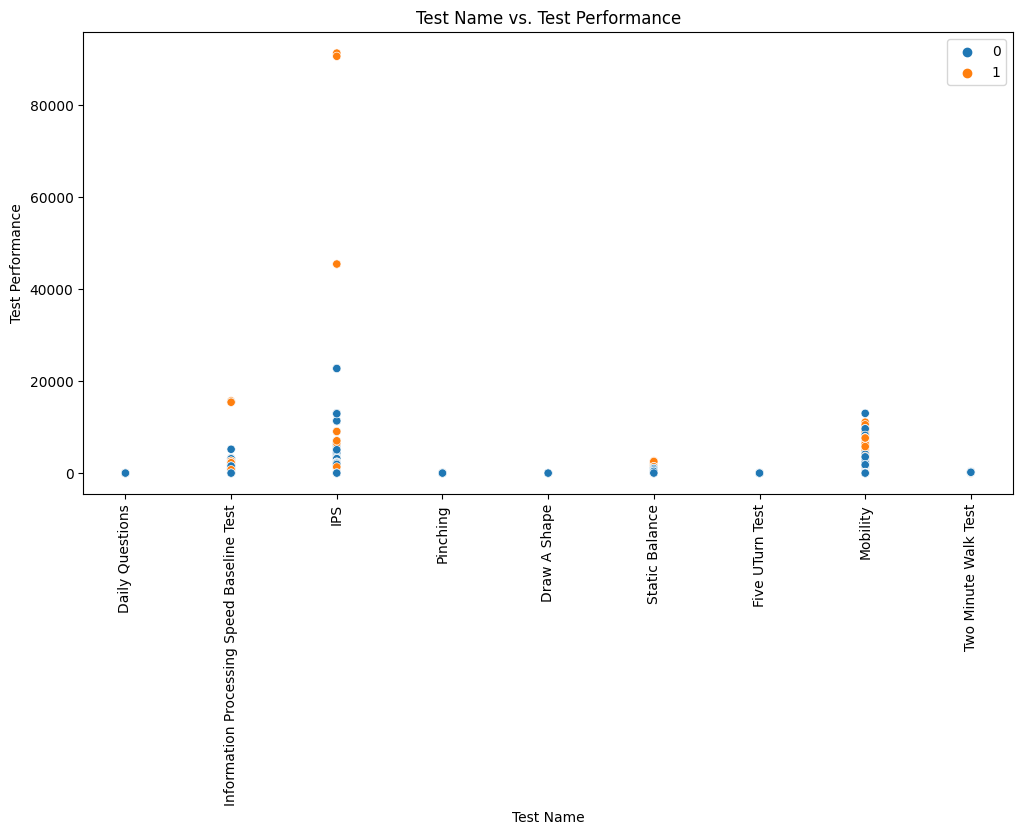

In [37]:
# Comparison between different test types based on 'testName'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='testName', y='testResultMetricValue', hue='participantIsControl_encoded')
plt.title('Test Name vs. Test Performance')
plt.xlabel('Test Name')
plt.ylabel('Test Performance')
plt.xticks(rotation=90)
plt.legend()
plt.show()

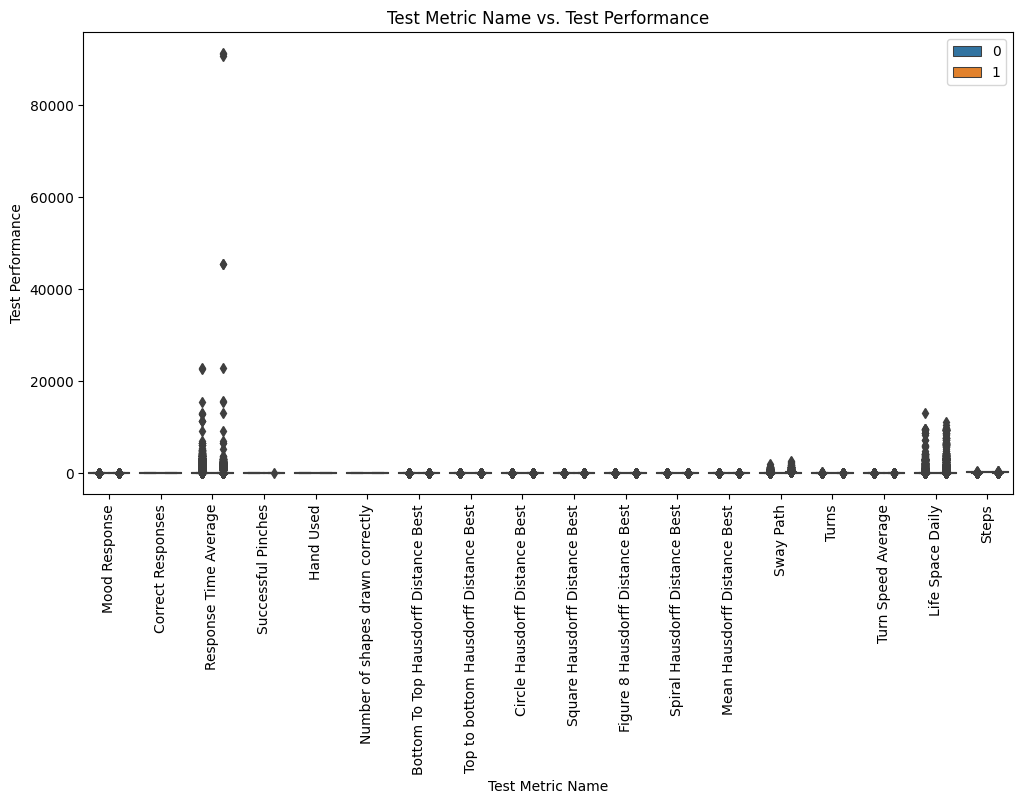

In [38]:
# Comparison between different test types based on 'testMetricName'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='testMetricName', y='testResultMetricValue', hue='participantIsControl_encoded')
plt.title('Test Metric Name vs. Test Performance')
plt.xlabel('Test Metric Name')
plt.ylabel('Test Performance')
plt.xticks(rotation=90)
plt.legend()
plt.show()

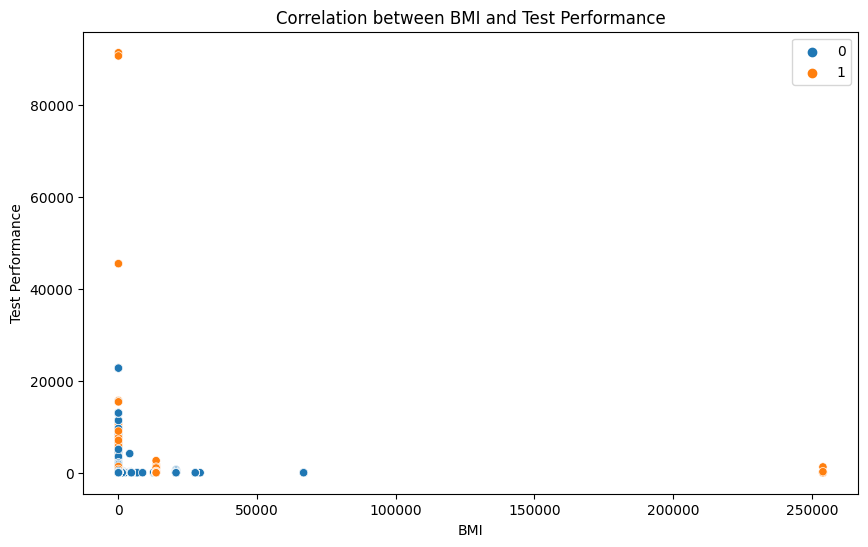

In [39]:
# Calculate BMI using participantWeightLbs and participantHeightCms
# Convert height to meters and weight to kilograms
df['BMI'] = (df['participantWeightLbs'] * 0.453592) / ((df['participantHeightCms'] / 100) ** 2)
# Categorize BMI ranges
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMICategory'] = df['BMI'].apply(categorize_bmi)

# Correlation between BMI and test performance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='testResultMetricValue', hue='participantIsControl_encoded')
plt.title('Correlation between BMI and Test Performance')
plt.xlabel('BMI')
plt.ylabel('Test Performance')
plt.legend()
plt.show()

In [40]:
df.columns

Index(['participantCreatedOn', 'participantBirthYear', 'participantWeightLbs',
       'participantHeightCms', 'testName', 'testCode', 'testMetricName',
       'testMetricCode', 'testStartedAt', 'testEndedAt',
       'testResultMetricCreatedOn', 'testResultMetricValue',
       'participantSex_encoded', 'participantIsControl_encoded',
       'participantCountry_encoded', 'participantAge', 'created_year',
       'created_month', 'created_day', 'taskDuration', 'BMI', 'BMICategory'],
      dtype='object')

In [41]:
values=['participantCreatedOn','participantBirthYear','testStartedAt','testEndedAt']
df=df.drop(columns=values)


In [42]:
df.head()

,participantWeightLbs,participantHeightCms,testName,testCode,testMetricName,testMetricCode,testResultMetricCreatedOn,testResultMetricValue,participantSex_encoded,participantIsControl_encoded,participantCountry_encoded,participantAge,created_year,created_month,created_day,taskDuration,BMI,BMICategory
0,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/23/2018 12:22:57 AM +00:00,4.00,1,1,15,57,2018,4,23,0.0,22.762634,Normal Weight
1,159.0,178.0,Daily Questions,daily_questions,Mood Response,mood_response,4/25/2018 4:04:32 AM +00:00,5.00,1,1,15,57,2018,4,23,0.0,22.762634,Normal Weight
2,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Correct Responses,correct_responses,4/25/2018 4:06:51 AM +00:00,16.00,1,1,15,57,2018,4,23,16.0,22.762634,Normal Weight
3,159.0,178.0,Information Processing Speed Baseline Test,ips_baseline,Response Time Average,response_time_avg,4/25/2018 4:06:51 AM +00:00,0.94,1,1,15,57,2018,4,23,16.0,22.762634,Normal Weight
4,159.0,178.0,IPS,ips,Correct Responses,correct_responses,4/25/2018 4:06:51 AM +00:00,39.00,1,1,15,57,2018,4,23,16.0,22.762634,Normal Weight


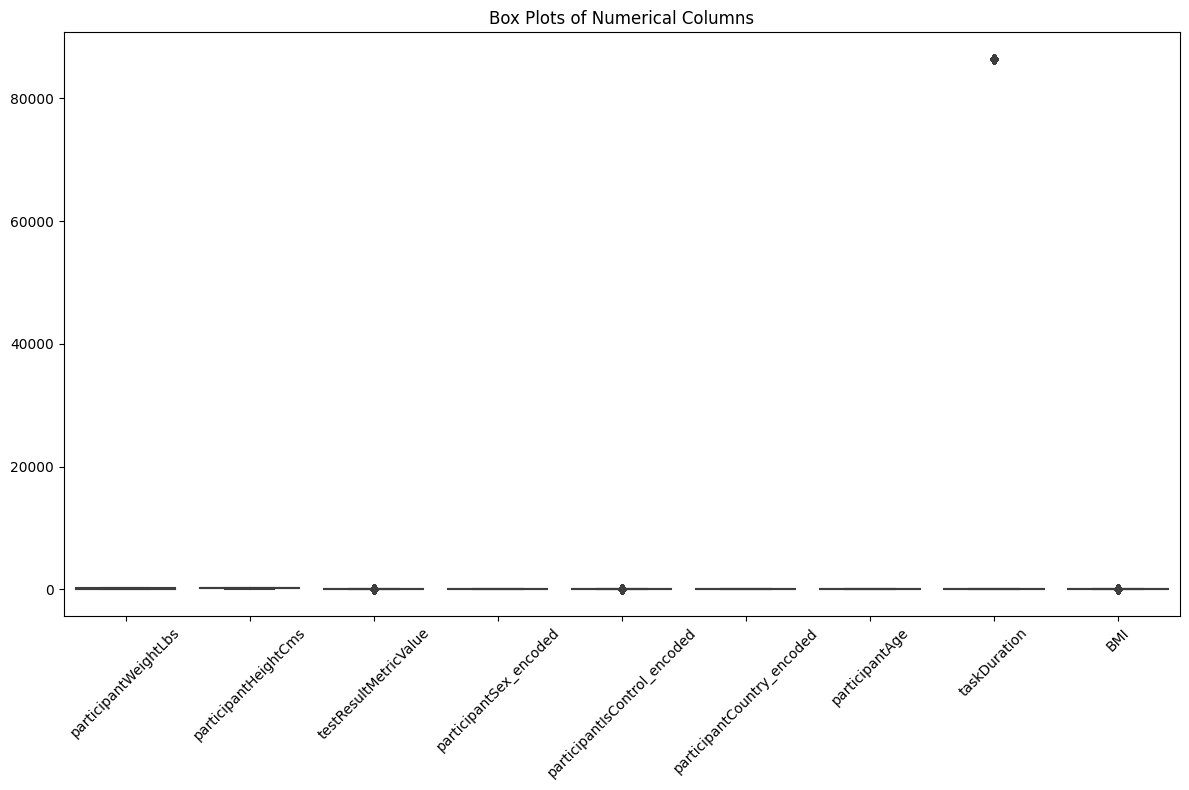

In [43]:
#dealing with outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column in the DataFrame
for column in numerical_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with values at specified percentiles
    df[column] = np.where(df[column] < lower_bound, np.percentile(df[column], 5), df[column])
    df[column] = np.where(df[column] > upper_bound, np.percentile(df[column], 95), df[column])

# Visualize the box plots of all numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df['participantIsControl_encoded'].value_counts()

participantIsControl_encoded
0.0    401001
1.0     84959
Name: count, dtype: int64

In [45]:
values =['testMetricName','testMetricCode' ,'testResultMetricCreatedOn' ]
df=df.drop(columns=values)

In [46]:
# Select the categorical columns
categorical_columns = ['BMICategory', 'testName', 'testCode']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Epoch 1/20
125/125 [==============================] - 11s 8ms/step - loss: 59.3058 - accuracy: 0.7146 - val_loss: 71.2887 - val_accuracy: 0.8174
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 48.3866 - accuracy: 0.7171 - val_loss: 36.6085 - val_accuracy: 0.8169
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 39.8272 - accuracy: 0.7234 - val_loss: 36.5526 - val_accuracy: 0.8029
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 33.2477 - accuracy: 0.7170 - val_loss: 22.8402 - val_accuracy: 0.4812
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 35.7081 - accuracy: 0.7176 - val_loss: 55.2268 - val_accuracy: 0.8174
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 33.8168 - accuracy: 0.7179 - val_loss: 23.3235 - val_accuracy: 0.6713
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 30.3219 - accuracy: 0.7201 - val_loss: 36.6567 - val_accuracy

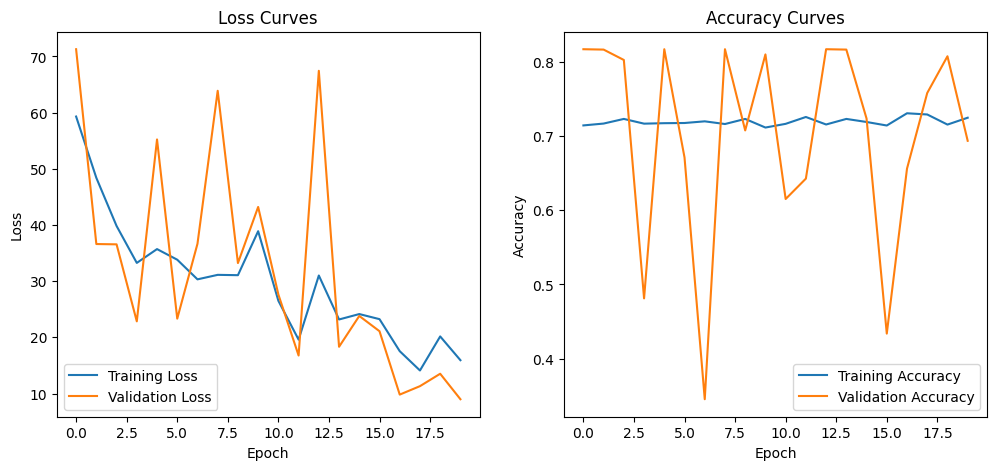

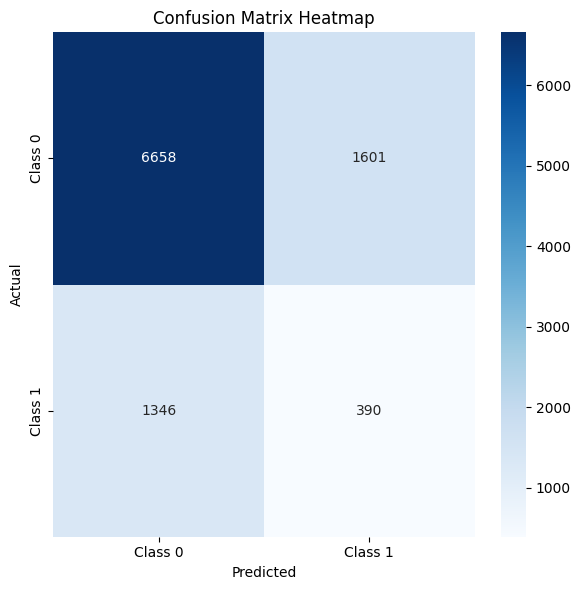

In [47]:

#1D CNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Choose a smaller subset of data for modeling
subset_size = 10000  
subset_df = df.sample(n=subset_size, random_state=42)

# Choose the new target variable
target_variable = 'participantIsControl_encoded'

# Create sequences for time series data
sequence_length = 5  
X_sequences = []
y_labels = []

for i in range(len(subset_df) - sequence_length):
    X_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i+sequence_length])
    y_labels.append(subset_df[target_variable].iloc[i+sequence_length])

X_sequences = np.array(X_sequences).astype('float32')
y_labels = np.array(y_labels).astype('float32')

# Split into training and validation sets
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Build a 1D CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(sequence_length, X_sequences.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Train the 1D CNN model with 30 epochs
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_data=(X_val_seq, y_val_seq))

# Predict future values using the 1D CNN model
X_test_sequences = []
for i in range(len(subset_df) - sequence_length):
    X_test_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences).astype('float32')
y_pred = model.predict(X_test_sequences)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_labels, y_pred_binary)
precision = precision_score(y_labels, y_pred_binary)
recall = recall_score(y_labels, y_pred_binary)
f1 = f1_score(y_labels, y_pred_binary)
confusion = confusion_matrix(y_labels, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

# Create a heatmap
class_names = ['Class 0', 'Class 1']
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()


In [48]:
from tensorflow.keras.models import load_model
model.save('cnn_task2.h5')